In [1]:
import sympy as sp
import seaborn as sns
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
sns.set_style('darkgrid')
#1
x, t = sp.symbols('x t')
y = sp.Function('y')
f = (t * x**2)/(sp.sqrt(t**2 + 4))
equation = sp.Eq(y(x).diff(x), ((x * y(x)**2)/(sp.sqrt(x**2) + 4))) #x**2 - 4 --> x**2 + 4
sp.dsolve(equation).rhs

-1/(C1 + sqrt(x**2) - 4*log(sqrt(x**2) + 4))

In [2]:
solution = sp.dsolve(equation, ics={y(1):1}).rhs
solution

-1/(sqrt(x**2) - 4*log(sqrt(x**2) + 4) - 2 + 4*log(5))

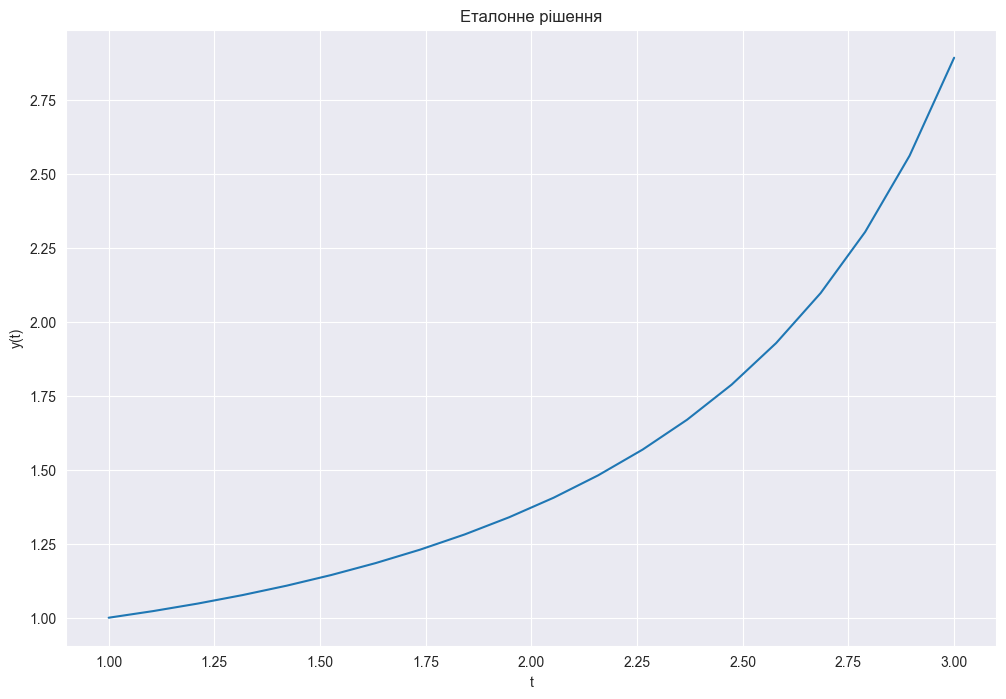

In [3]:
def func(t, y):
    return (t * y**2)/(np.sqrt(t**2) + 4)
t = np.linspace(1, 3, 20)
sol = odeint(func, y0 = 1, t = t, tfirst=True)
plt.figure(figsize=(12, 8))
plt.plot(t, sol)
plt.title('Еталонне рішення')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

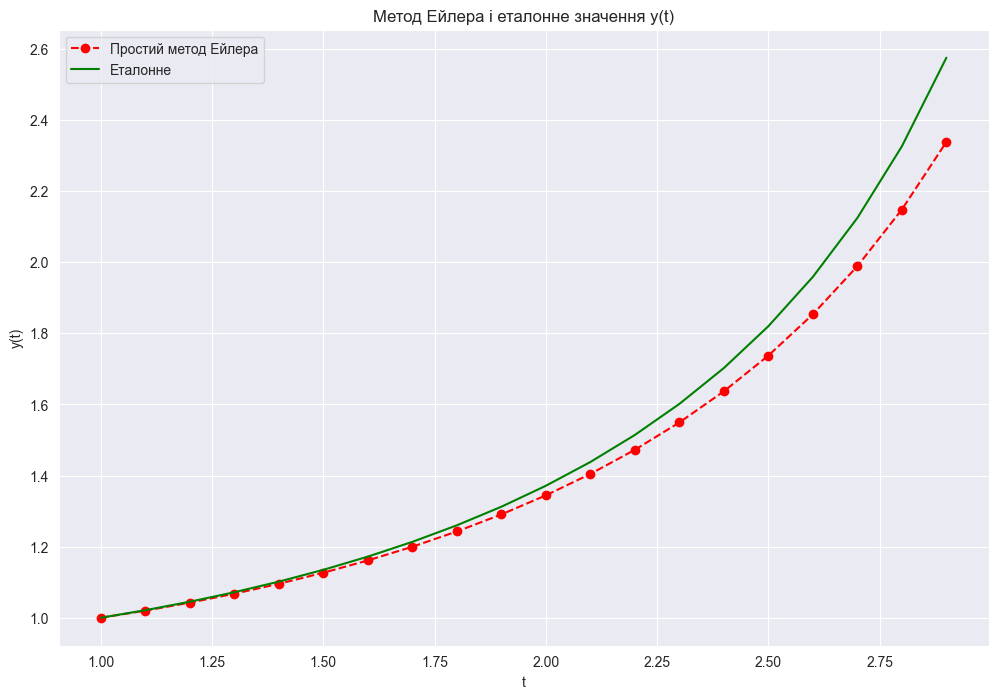

Похибка = 0.000166666666666667


In [4]:
#Метод Ейлера
tau = 0.1
t = np.arange(1, 3, tau)
s = np.zeros(len(t))
s[0] = 1
for i in range(len(t)-1):
    s[i+1] = s[i] + tau * func(t[i], s[i])
plt.figure(figsize=(12, 8))
plt.plot(t, s, 'ro--', label='Простий метод Ейлера')
plt.plot(t, odeint(func, y0 = 1, t = t, tfirst=True), color="green", label='Еталонне')
plt.title('Метод Ейлера і еталонне значення y(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend(loc='upper left')
plt.show()
#Обраховуємо похибку
eps1 = 0.1**3 * solution.subs(x, 1)/6
print(f'Похибка = {eps1}')

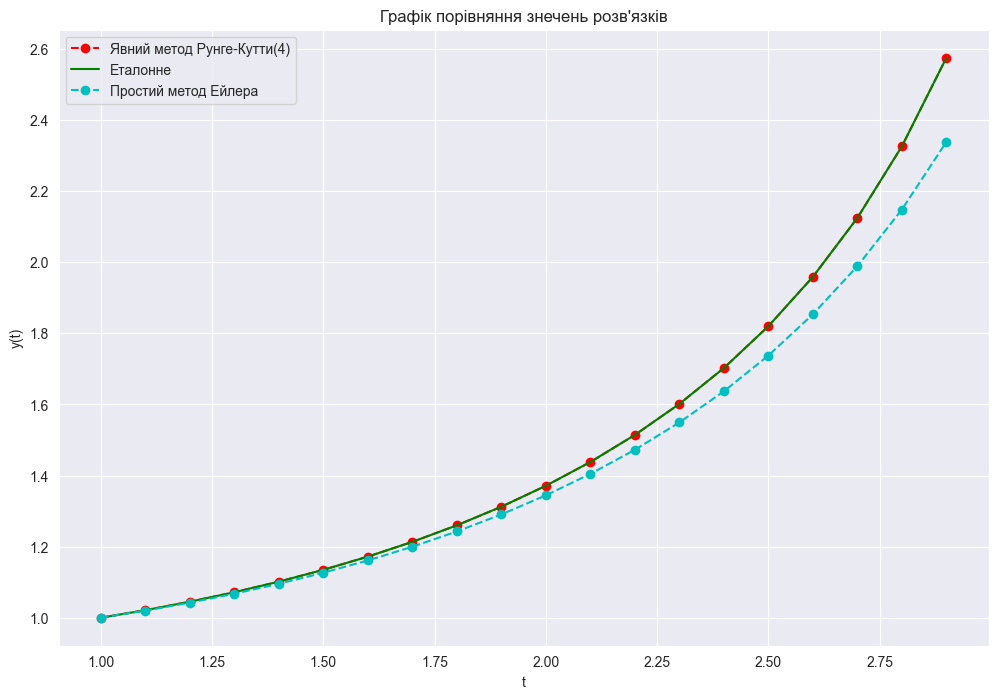

In [5]:
#Явний метод Рунге-Кутти 4 порядку
T = np.zeros(20)
n = len(T)
X = np.zeros(20)
tao = 0.1
T[0] = 1.
X[0] = 1.
for i in range(n-1):
    K1 = func(T[i], X[i])
    K2 = func(T[i] + tao/2, X[i] + tao*K1/2)
    K3 = func(T[i] + tao/2, X[i] + tao*K2/2)
    K4 = func(T[i] + tao, X[i] + tao*K2)
    X[i+1] = X[i] + tao*(K1 + 2*K2 + 2*K3 + K4)/6
    T[i+1] = T[i] + tao
t_rk_yavn = T
x_rk_yavn = X
plt.figure(figsize=(12, 8))
plt.plot(T, X, 'ro--', label='Явний метод Рунге-Кутти(4)')
plt.plot(t, odeint(func, y0 = 1, t = t, tfirst=True), color="green", label='Еталонне')
plt.title('Графік порівняння знечень розв\'язків')
plt.plot(t, s, 'co--', label='Простий метод Ейлера')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend(loc='upper left')
plt.show()

                    b
b1  0.277777777777778
b2  0.444444444444445
b3  0.277777777777778
                     ax1                ax2                ax3
ax1    0.138888888888889  0.300263194980865  0.267988333762469
ax2  -0.0359766675249389  0.222222222222222  0.480421111969384
ax3  0.00978944401530832  0.222222222222222  0.138888888888889


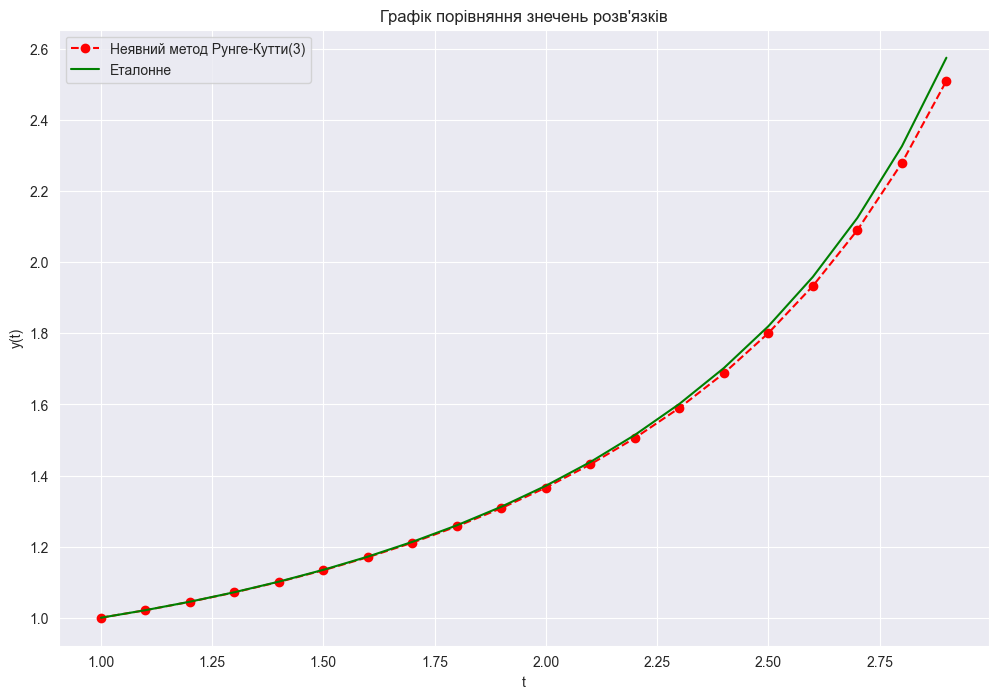

In [6]:
#4 Неявний метод Рунге-Кутти 3-го порядку
c = np.array([1/2 - np.sqrt(15)/10, 1/2, 1/2 + np.sqrt(15)/10])
t1= sp.symbols('t1')
l1 = (t1 - c[1])*(t1 - c[2])/((c[0] - c[1])*(c[0] - c[2]))
l2 = (t1 - c[0])*(t1 - c[2])/((c[1] - c[0])*(c[1] - c[2]))
l3 = (t1 - c[0])*(t1 - c[1])/((c[2] - c[0])*(c[2] - c[1]))
b = np.array([sp.integrate(l1, (t1, 0, 1)), sp.integrate(l2, (t1, 0, 1)), sp.integrate(l3, (t1, 0, 1))])
dfb = pd.DataFrame({'b':b}, index=['b1', 'b2', 'b3'])
print(dfb)
a = np.array([[sp.integrate(l1, (t1, 0, c[0])), sp.integrate(l2, (t1, 0, c[0])), sp.integrate(l3, (t1, 0, c[0]))],
              [sp.integrate(l1, (t1, 0, c[1])), sp.integrate(l2, (t1, 0, c[1])), sp.integrate(l2, (t1, 0, c[1]))],
              [sp.integrate(l1, (t1, 0, c[2])), sp.integrate(l2, (t1, 0, c[2])), sp.integrate(l3, (t1, 0, c[2]))]])
dfa = pd.DataFrame({'ax1': a[:][0], 'ax2': a[:][1], 'ax3': a[:][2]}, index=['ax1', 'ax2', 'ax3'])
print(dfa)
s = len(c)
T = np.zeros(20)
n = 20
X = np.zeros(20)
K = np.zeros(s)
tau4 = 0.1
T[0] = 1
X[0] = 1
for num in range(n - 1):
    b_s = 0
    K[0] = func(T[num], X[num])
    for i in range(s):
        K[i] = func(T[num] + c[i]*tau4, X[num] + tau4*sum([a[i][j]*K[j] for j in range(i)]))
        b_s += b[i]*K[i]
    X[num + 1] = X[num] + tau4*b_s
    T[num + 1] = T[num] + tau4
# print(f'T = {T}, X = {X}')
t_RK3 = T
x_RK3 = X
plt.figure(figsize=(12, 8))
plt.plot(T, X, 'ro--', label='Неявний метод Рунге-Кутти(3)')
plt.plot(t, odeint(func, y0 = 1, t = t, tfirst=True), color="green", label='Еталонне')
plt.title('Графік порівняння знечень розв\'язків')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend(loc='upper left')
plt.show()

    ax1                  ax2                   ax3                ax4
ax1   0    0.125000000000000     0.111111111111111  0.125000000000000
ax2   0    0.263888888888889     0.444444444444445  0.374999999999999
ax3   0  -0.0694444444444445     0.111111111111111  0.375000000000000
ax4   0   0.0138888888888889  5.55111512312578e-17  0.125000000000000
                    b
b1  0.125000000000000
b2  0.374999999999999
b3  0.375000000000000
b4  0.125000000000000


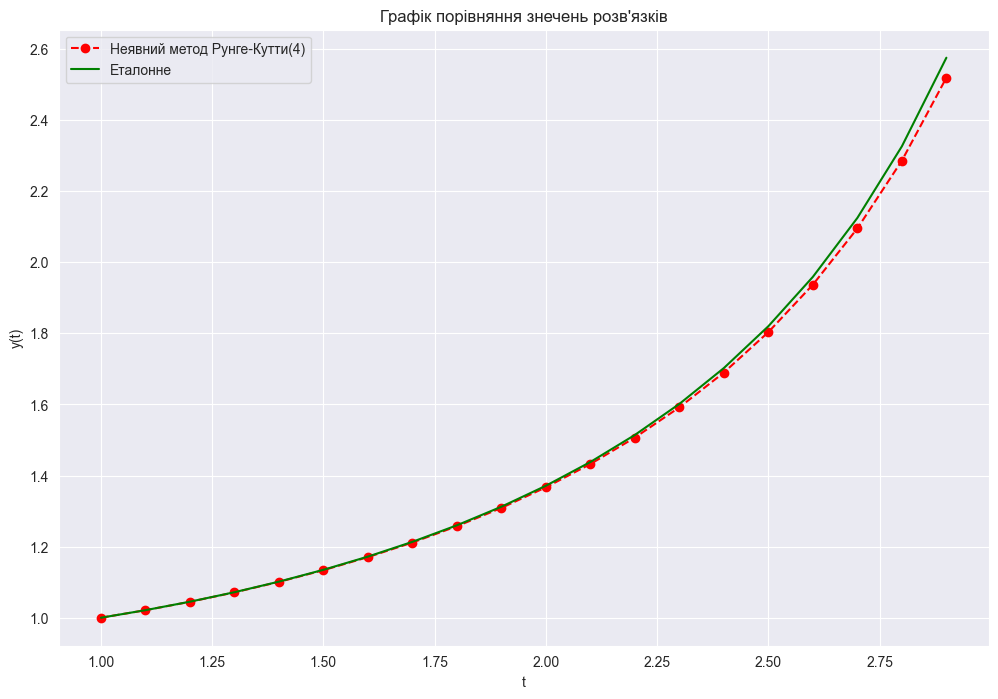

In [7]:
#4 Неявний метод Рунге-Кутти 4
c = np.array([0, 1/3, 2/3, 1])
l1 = (t1 - c[1])*(t1 - c[2])*(t1 - c[3])/((c[0] - c[1])*(c[0] - c[2])*(c[0] - c[3]))
l2 = (t1 - c[0])*(t1 - c[2])*(t1 - c[3])/((c[1] - c[0])*(c[1] - c[2])*(c[1] - c[3]))
l3 = (t1 - c[0])*(t1 - c[1])*(t1 - c[3])/((c[2] - c[0])*(c[2] - c[1])*(c[2] - c[3]))
l4 = (t1 - c[0])*(t1 - c[1])*(t1 - c[2])/((c[3] - c[0])*(c[3] - c[1])*(c[3] - c[2]))
a = np.array([[0, 0, 0, 0],
             [sp.integrate(l1, (t1, 0, c[1])), sp.integrate(l2, (t1, 0, c[1])), sp.integrate(l3, (t1, 0, c[1])), sp.integrate(l4, (t1, 0, c[1]))],
             [sp.integrate(l1, (t1, 0, c[2])), sp.integrate(l2, (t1, 0, c[2])), sp.integrate(l3, (t1, 0, c[2])), sp.integrate(l4, (t1, 0, c[2]))],
             [sp.integrate(l1, (t1, 0, c[3])), sp.integrate(l2, (t1, 0, c[3])), sp.integrate(l3, (t1, 0, c[3])), sp.integrate(l4, (t1, 0, c[3]))]])
dfa4 = pd.DataFrame({'ax1': a[:][0], 'ax2': a[:][1], 'ax3': a[:][2], 'ax4': a[:][3]}, index=['ax1', 'ax2', 'ax3', 'ax4'])
print(dfa4)
b = np.array([sp.integrate(l1, (t1, 0, 1)), sp.integrate(l2, (t1, 0, 1)), sp.integrate(l3, (t1, 0, 1)), sp.integrate(l4, (t1, 0, 1))])
dfb4 = pd.DataFrame({'b':b}, index=['b1', 'b2', 'b3', 'b4'])
print(dfb4)
s = len(c)
T = np.zeros(20)
n = 20
X = np.zeros(20)
K = np.zeros(s)
tao4 = 0.1
T[0] = 1
X[0] = 1
for num in range(n - 1):
    b_s = 0
    K[0] = func(T[num], X[num])
    for i in range(s):
        K[i] = func(T[num] + c[i]*tao4, X[num] + tao4*sum([a[i][j]*K[j] for j in range(i)]))
        b_s += b[i]*K[i]
    X[num + 1] = X[num] + tao4*b_s
    T[num + 1] = T[num] + tao4
T_RKX4 = T
X_RKX4 = X
plt.figure(figsize=(12, 8))
plt.plot(T, X, 'ro--', label='Неявний метод Рунге-Кутти(4)')
plt.plot(t, odeint(func, y0 = 1, t = t, tfirst=True), color="green", label='Еталонне')
plt.title('Графік порівняння знечень розв\'язків')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend(loc='upper left')
plt.show()

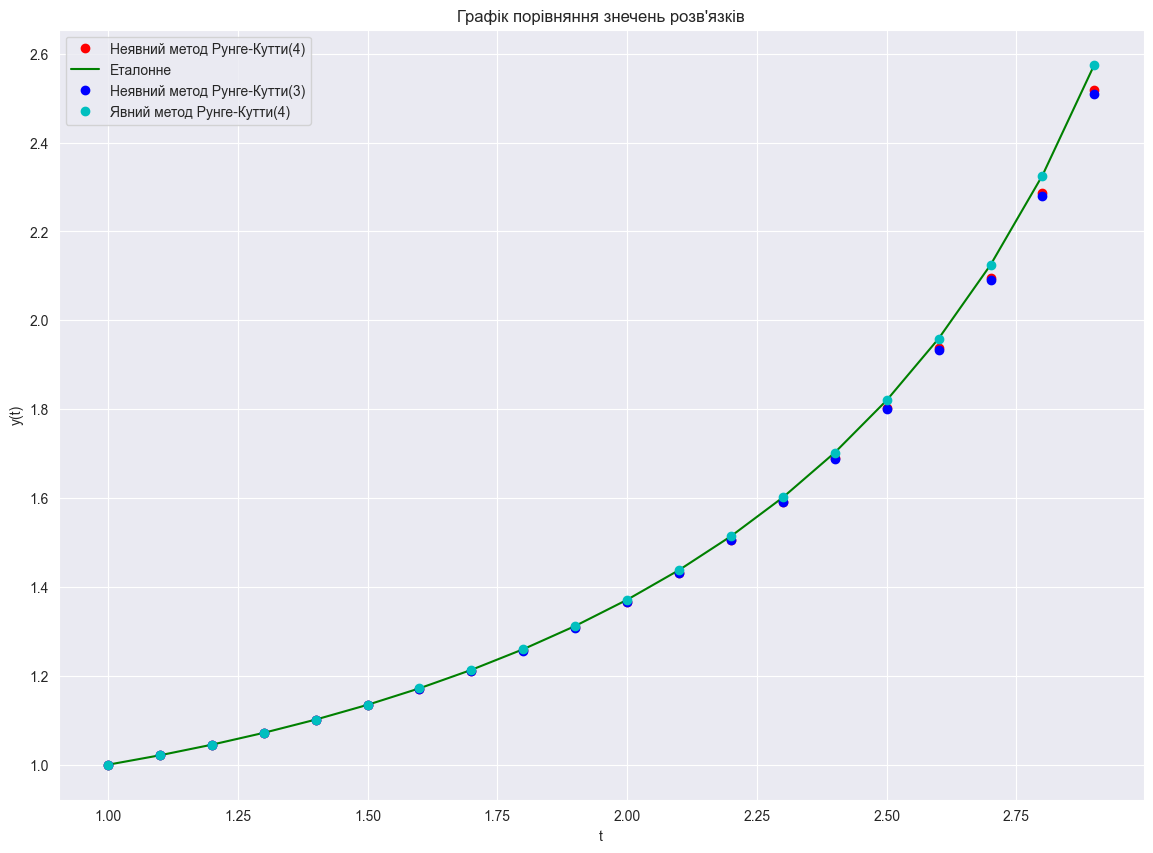

In [8]:
#5-6
plt.figure(figsize=(14, 10))
plt.plot(T_RKX4, X_RKX4, 'ro', label='Неявний метод Рунге-Кутти(4)')
plt.plot(t, odeint(func, y0 = 1, t = t, tfirst=True), color="green", label='Еталонне')
plt.plot(t_RK3, x_RK3, 'bo', label='Неявний метод Рунге-Кутти(3)')
plt.plot(t_rk_yavn, x_rk_yavn, 'co', label='Явний метод Рунге-Кутти(4)')
plt.title('Графік порівняння знечень розв\'язків')
plt.xlabel('t')
plt.ylabel('y(t)')
# plt.xticks([1, 1.5, 2.5, 3, 3.5])
plt.legend(loc='upper left')
plt.show()

Як бачимо розбіжності дуже маленькі.

In [9]:
#7 Підготуємо точки для методів Адамса і Мілна
tao7 = 1/20
T = np.linspace(1, 2, 20)
n = len(T)
X = odeint(func, y0 = 1, t = T, tfirst=True)
print(f'Точки для розгону: \n{T[:4]} \n{X[:4]}')

Точки для розгону: 
[1.         1.05263158 1.10526316 1.15789474] 
[[1.        ]
 [1.01086312]
 [1.02241839]
 [1.03469585]]


Значення покрокової абсолютної похибки ε: 
[8.687948980319174e-06, 1.1633039917021195e-05, 1.2233423792517745e-06, 4.98839533649613e-07, 1.2395698269974702e-06, 6.574381574238293e-07, 1.5542674823574988e-06, 4.3114586285050426e-07, 2.0884779223948526e-06, 1.4733369146924247e-07, 3.1688906458882116e-06, 1.6260383412226996e-06, 5.727905333880093e-06, 5.688637041852081e-06, 1.2910183148781658e-05, 1.855969774776989e-05]


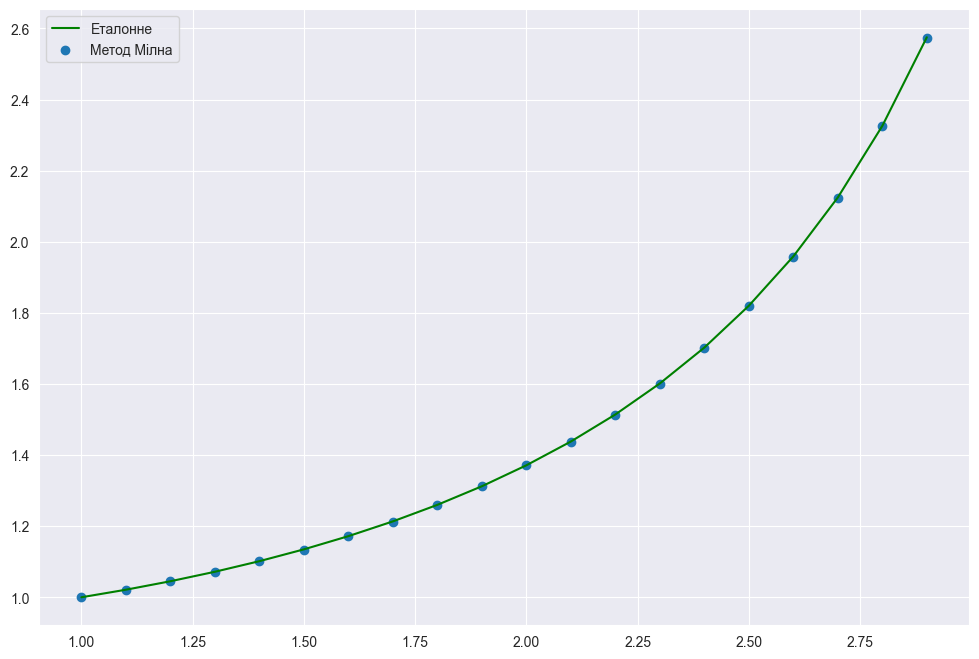

In [10]:
h = 0.1
t8 = np.arange(1, 3, h)
y = np.zeros(len(t8))
y[:4] = X_RKX4[:4]
eps = []
for i in range(4, len(t8)):
    yp = (y[i-4] + (4*h/3)*(2*func(t8[i-3], y[i-3]) - func(t8[i-2], y[i-2]) + 2*func(t8[i-1], y[i-1])))
    y[i] = (y[i-2] + (h/3)*(func(t8[i-2], y[i-2]) + 4*func(t8[i-1], y[i-1]) + func(t8[i], yp)))
    eps.append(abs(yp - y[i])/29)
y8 = y
print(f'Значення покрокової абсолютної похибки \u03B5: \n{eps}')
plt.figure(figsize=(12, 8))
plt.plot(t, odeint(func, y0 = 1, t = t, tfirst=True), color="green", label='Еталонне')
plt.scatter(t8, y, label='Метод Мілна')
plt.legend()
plt.show()

In [11]:
df8 = pd.DataFrame({'t': T, 'y': y})
print(df8)

           t         y
0   1.000000  1.000000
1   1.052632  1.021109
2   1.105263  1.044781
3   1.157895  1.071247
4   1.210526  1.101193
5   1.263158  1.134250
6   1.315789  1.171525
7   1.368421  1.212855
8   1.421053  1.259502
9   1.473684  1.311587
10  1.526316  1.370650
11  1.578947  1.437256
12  1.631579  1.513433
13  1.684211  1.600500
14  1.736842  1.701397
15  1.789474  1.818820
16  1.842105  1.957538
17  1.894737  2.123042
18  1.947368  2.324157
19  2.000000  2.572851


Покрокова похибка ε = [5.902036584587861e-07, 2.51423062642868e-07, 6.313750015627908e-07, 5.296800030721945e-07, 6.91309831055356e-07, 9.234216269757503e-07, 1.2472824159999344e-06, 1.7101133788371542e-06, 2.384727955909801e-06, 3.3898958931363958e-06, 4.92487377409171e-06, 7.334858611510816e-06, 1.1240160205398061e-05, 1.7803154328908623e-05, 2.9310251920211527e-05, 5.052212322153283e-05]


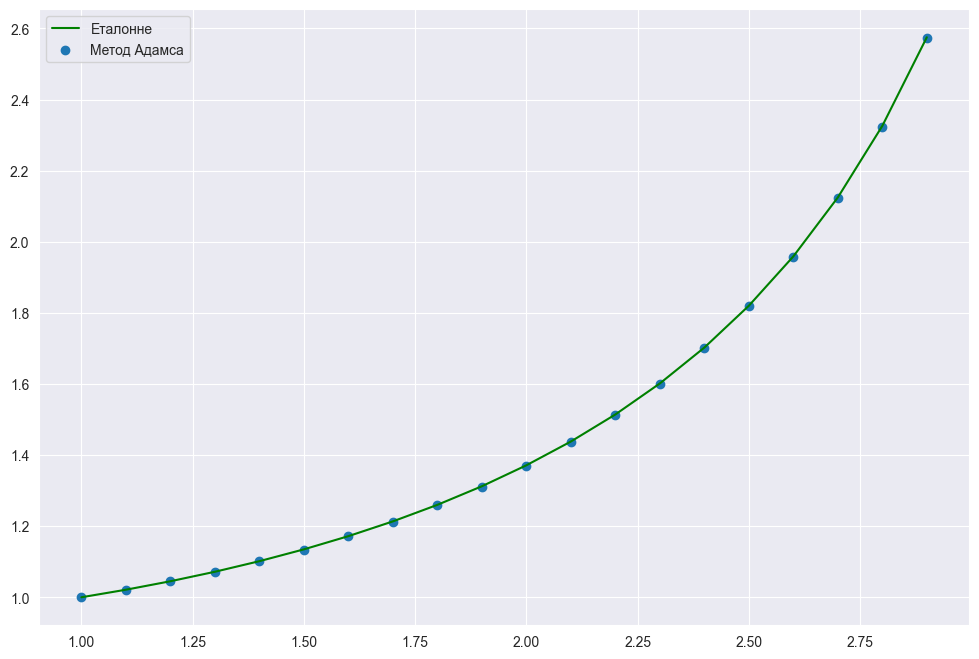

In [12]:
#9
epsa = []
T = np.arange(1, 3, h)
y = np.zeros(len(T))
y[:4] = y8[:4]
for i in range(4, len(T)):
    yp = (y[i-1] + (h/24)*(55*func(T[i-1], y[i-1]) - 59*func(T[i-2], y[i-2]) + 37*func(T[i-3], y[i-3]) - 9*func(T[i-4], y[i-4])))
    y[i] = (y[i-1] + (h/24)*(9*func(T[i], yp) + 19*func(T[i-1], y[i-1]) - 5*func(T[i-2], y[i-2]) +func(T[i-3], y[i-3])))
    epsa.append(abs(yp - y[i])/13)
t_adam = T
y_adam = y
print(f'Покрокова похибка \u03B5 = {epsa}')
plt.figure(figsize=(12, 8))
plt.plot(t, odeint(func, y0 = 1, t = t, tfirst=True), color="green", label='Еталонне')
plt.scatter(T, y, label='Метод Адамса')
plt.legend()
plt.show()

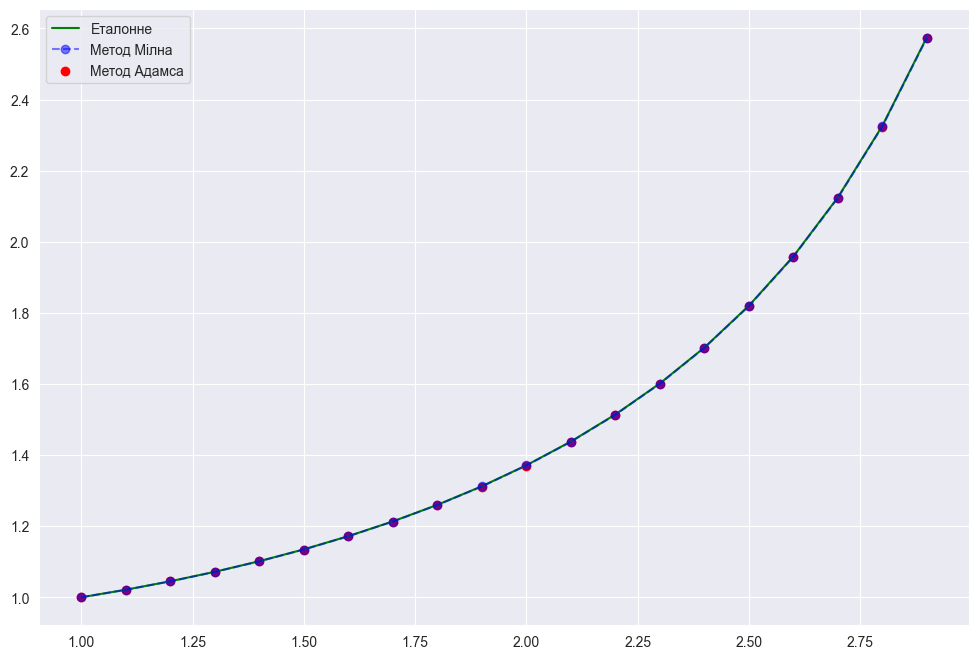

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(t, odeint(func, y0 = 1, t = t, tfirst=True), color="green", label='Еталонне')
plt.plot(t8, y8, 'bo--', label='Метод Мілна', alpha=0.5)
plt.scatter(T, y, label='Метод Адамса', color='red')
plt.legend()
plt.show()

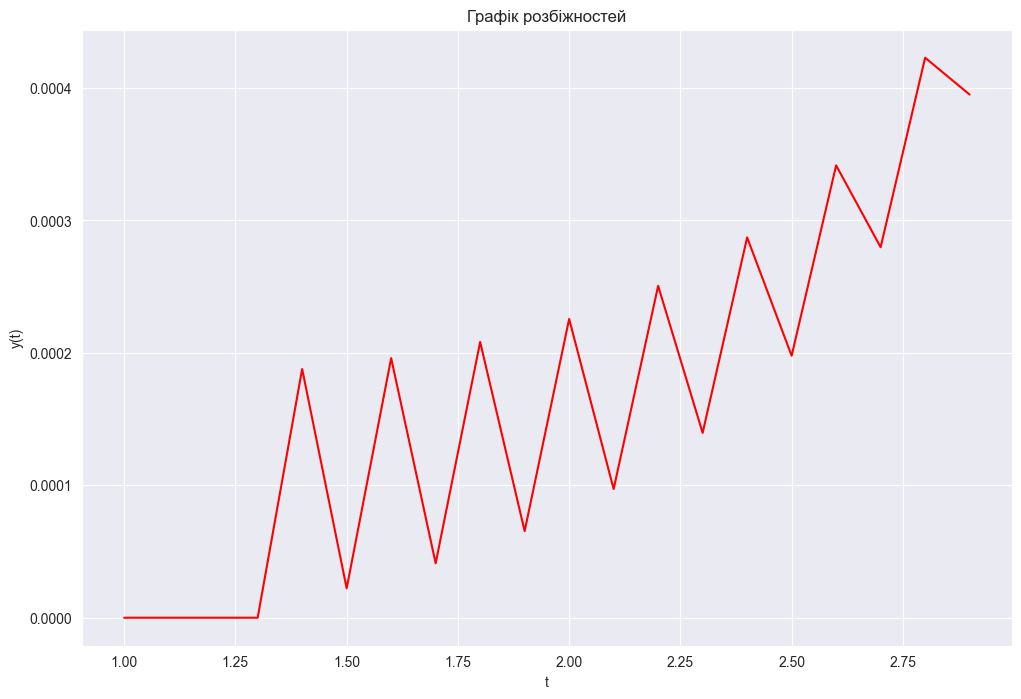

In [14]:
#Графік подано у масштабі
y_delta = abs(y8 - y)
plt.figure(figsize=(12, 8))
plt.plot(T, y_delta, label='delta', color='red')
plt.title('Графік розбіжностей')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

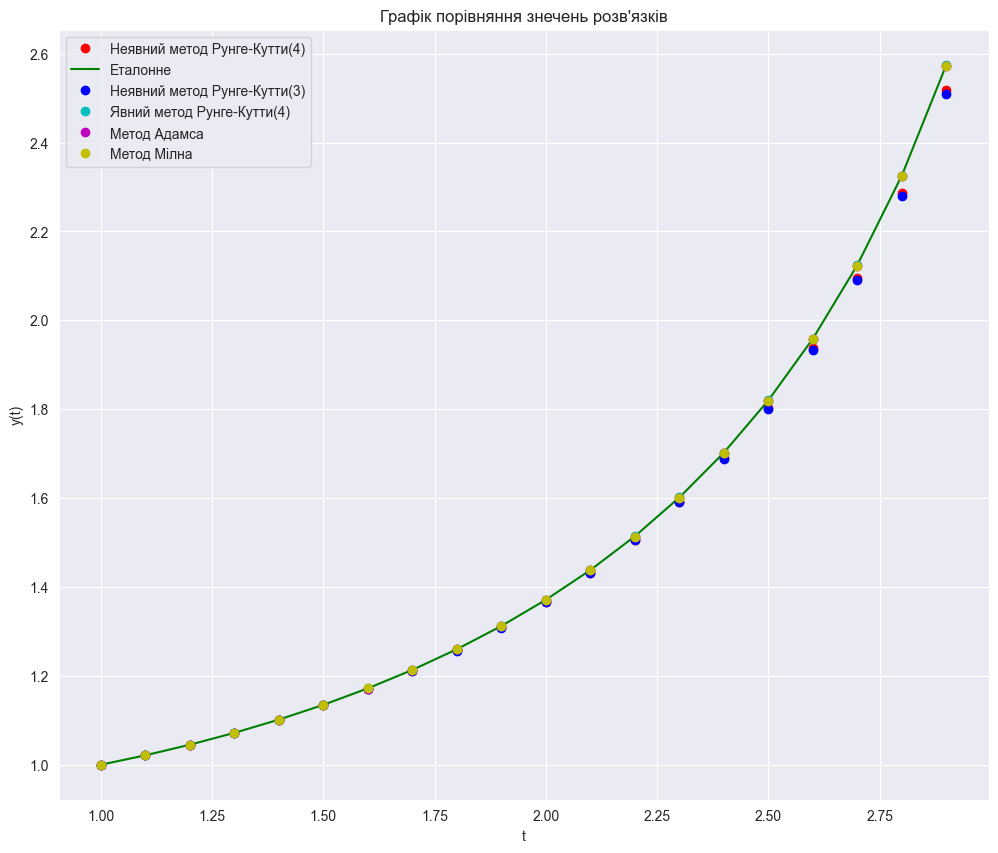

In [15]:
#10
plt.figure(figsize=(12, 10))
plt.plot(T_RKX4, X_RKX4, 'ro', label='Неявний метод Рунге-Кутти(4)')
plt.plot(t, odeint(func, y0 = 1, t = t, tfirst=True), color="green", label='Еталонне')
plt.plot(t_RK3, x_RK3, 'bo', label='Неявний метод Рунге-Кутти(3)')
plt.plot(t_rk_yavn, x_rk_yavn, 'co', label='Явний метод Рунге-Кутти(4)')
plt.plot(t_adam, y_adam, 'mo', label='Метод Адамса')
plt.plot(t8, y8, 'yo', label='Метод Мілна')
plt.title('Графік порівняння знечень розв\'язків')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend(loc='upper left')
plt.show()